In [164]:
import matplotlib.pyplot as plt
import torch
import torchvision

In [165]:
#hyper-parameters
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 1
EPOCHS = 20
LR = 0.01

In [166]:
torch.cuda.is_available(),torch.cuda.get_device_name(),torch.cuda.device_count()

(True, 'NVIDIA GeForce RTX 3050 Laptop GPU', 1)

In [167]:
train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=True, download=True, 
                           transform=torchvision.transforms.Compose([
                           torchvision.transforms.ToTensor(),
                           torchvision.transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=BATCH_SIZE, shuffle=True)
print(len(train_loader)) #the size of dataset, 60000 of images

60000


In [168]:
#load test data
test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=False, 
                           transform=torchvision.transforms.Compose([
                           torchvision.transforms.ToTensor(),
                           torchvision.transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=BATCH_SIZE, shuffle=True)
print(len(test_loader)) #size of test data , 10000 images

10000


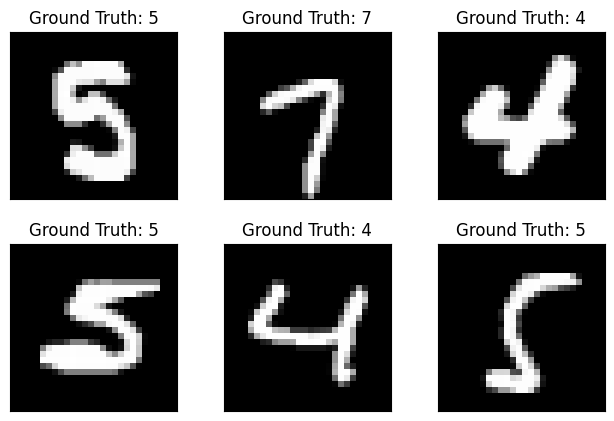

In [169]:
#have a look on data

examples = enumerate(test_loader)
id, (image,label) = next(examples)
#examples is a batch of images, 
#when BATCH_SIZE == 1:
#example[0] is a order signed by enumerate(), 
#example[1][0] is the tensor of image,
#example[1][1] is the label of the image 0~9

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(image[0][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(label[0]))
  plt.xticks([])
  plt.yticks([])
  id, (image,label) = next(examples)

In [170]:
# model
model = torch.nn.Sequential(
    
    torch.nn.Linear(784,800),
    torch.nn.ReLU(),
    torch.nn.Linear(800,50),
    torch.nn.ReLU(),
    torch.nn.Linear(50,10),
    torch.nn.Softmax(),
)

In [174]:
# loss function & optimizater
loss_fn = torch.nn.NLLLoss() #nll_loss for classification
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [ ]:
# Accuracy check round 1(before training)

counter = 0 # count the number of right guess

for image,label in test_loader:
    input = image[0][0].reshape(1,784)
    output = model(input)
    pred_label = int(torch.argmax(output))
    label = int(label)
    if pred_label == label:
        counter += 1
accuracy = counter/len(test_loader)

accuracy
        

In [175]:
#Trainning process
for image,label in train_loader:
    
    optimizer.zero_grad()
    
    input = image[0][0].reshape(1,784)
    output = model(input)
    loss = loss_fn(output,label)
    
    loss.backward()
    optimizer.step()
    
    print('loss {}'.format(loss.item()))
    
print("finish!!")

loss -0.09720822423696518
loss -0.09493899345397949
loss -0.1080932468175888
loss -0.11649154871702194
loss -0.08078020066022873
loss -0.09365575760602951
loss -0.1053093746304512
loss -0.09534619003534317
loss -0.09275098145008087
loss -0.10041532665491104
loss -0.10427197068929672
loss -0.09386426955461502
loss -0.0860583558678627
loss -0.09827842563390732
loss -0.09895763546228409
loss -0.10184027999639511
loss -0.10607007890939713
loss -0.09100393205881119
loss -0.08083612471818924
loss -0.09530290216207504
loss -0.10099468380212784
loss -0.10121097415685654
loss -0.09001726657152176
loss -0.1009950339794159
loss -0.10954175144433975
loss -0.09293697774410248
loss -0.09526458382606506
loss -0.11863477528095245
loss -0.10992410033941269
loss -0.11435984820127487
loss -0.07743044197559357
loss -0.09927960485219955
loss -0.11071309447288513
loss -0.0940593034029007
loss -0.09075868129730225
loss -0.10344488173723221
loss -0.09241392463445663
loss -0.1041734516620636
loss -0.1216943413

In [176]:
# Accuracy check round 2(after training)

counter = 0 # count the number of right guess

for image,label in test_loader:
    input = image[0][0].reshape(1,784)
    output = model(input)
    pred_label = int(torch.argmax(output))
    label = int(label)
    if pred_label == label:
        counter += 1
accuracy = counter/len(test_loader)

accuracy
        

0.9243

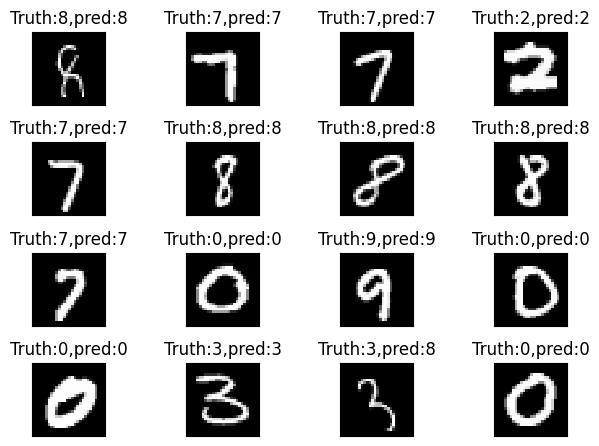

In [177]:
# test & presentation
result = enumerate(test_loader)
id, (image,label) = next(result)

fig = plt.figure()
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
    
  input = image.reshape(1,784)
  output = model(input)
  pred_label = int(torch.argmax(output))
    
  plt.imshow(image[0][0], cmap='gray', interpolation='none')
  plt.title("Truth:{},pred:{}".format(label[0],pred_label))
  
  plt.xticks([])
  plt.yticks([])
  id, (image,label) = next(result)